In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
breast_cancer = load_breast_cancer()
x = breast_cancer.data
y = breast_cancer.target

In [5]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)

# KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 13)}

knn= KNeighborsClassifier()
knn_cv= GridSearchCV(knn, param_grid, cv = 5).fit(x, y)

print(knn_cv.best_params_)
print('The best score = ', knn_cv.best_score_)

{'n_neighbors': 12}
The best score =  0.9332246545567457


In [8]:
knn = KNeighborsClassifier(n_neighbors=12).fit(x_train, y_train)
y_pre_knn = knn.predict(x_test)
knn.score(x_test , y_test)

0.9824561403508771

In [10]:
from sklearn.metrics import confusion_matrix , classification_report
print('Confusion_Matrix =\n', confusion_matrix(y_test , y_pre_knn , [0, 1]))
print('\nReport:\n', classification_report(y_test , y_pre_knn))

Confusion_Matrix =
 [[41  2]
 [ 0 71]]

Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [13]:
param_dtc = {'max_depth':[None , 5], 
            'max_features':randint(1, 9)}

dtc = DecisionTreeClassifier()
dtc_cv = RandomizedSearchCV(dtc , param_dtc, cv= 5).fit(x, y)
print(dtc_cv.best_params_)
print(dtc_cv.best_score_)


{'max_depth': 5, 'max_features': 7}
0.9454898307716194


In [14]:
dtc = DecisionTreeClassifier(max_features=4, random_state=42).fit(x_train, y_train)
y_pre_dtc = dtc.predict(x_test)
dtc.score(x_test , y_test)

0.956140350877193

In [15]:
print('Confusion_Matrix =\n', confusion_matrix(y_test , y_pre_dtc , [0, 1]))
print('\nReport:\n', classification_report(y_test , y_pre_dtc))

Confusion_Matrix =
 [[40  3]
 [ 2 69]]

Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# Logestic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

logic_reg = LogisticRegression().fit(x_train, y_train)
y_pre_logic = logic_reg.predict(x_test)
con_mat = confusion_matrix(y_test , y_pre_logic , [0, 1])
print('Confusion_Matrix =\n',con_mat )
print('\nReport:\n', classification_report(y_test , y_pre_logic))

Confusion_Matrix =
 [[40  3]
 [ 1 70]]

Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# Normalize

In [17]:
from sklearn.preprocessing import normalize

In [18]:
import pandas as pd 
normal= normalize(con_mat,norm='l1', axis=1 )
pd.DataFrame(normal , columns=breast_cancer.target_names, index = breast_cancer.target_names)

,malignant,benign
malignant,0.930233,0.069767
benign,0.014085,0.985915


In [19]:
normal= normalize(con_mat,norm='l2', axis=1 )
pd.DataFrame(normal , columns=breast_cancer.target_names, index = breast_cancer.target_names)

,malignant,benign
malignant,0.997199,0.074790
benign,0.014284,0.999898


# ROC Curve

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

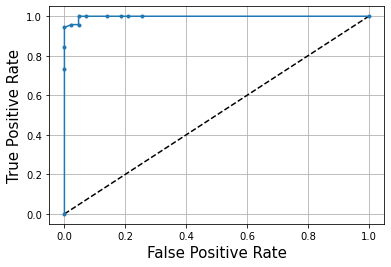

In [21]:
y_predict_knn = knn.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test , y_predict_knn)
roc_auc = roc_auc_score(y_test, y_predict_knn)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker ='.')
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.grid()

0.9510317720275139


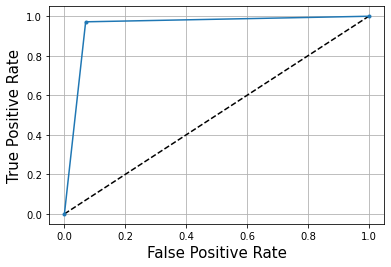

In [22]:
y_predict_dtc = dtc.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test , y_predict_dtc)
roc_auc = roc_auc_score(y_test, y_predict_dtc)
print(roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, '.-')
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.grid()

0.9580740255486406


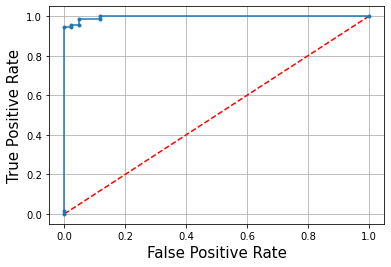

In [23]:
y_predict_logic = logic_reg.predict_proba(x_test)[:, 1]
fpr, tpr, threshold=roc_curve(y_test , y_predict_logic)
roc_auc = roc_auc_score(y_test, y_pre_logic)
print(roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr, tpr, '.-')
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.grid()

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB().fit(x_train, y_train)
y_pre_gnb = gnb.predict(x_test)


print(np.sum(y_pre_gnb>0))
print(np.sum(y_test > 0))
print(confusion_matrix(y_test, y_pre_gnb,[0,1] ))
print(classification_report(y_test, y_pre_gnb))

74
71
[[40  3]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
